**Basic imports:**

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import pickle

# Premise of Exploration

## Naturalistic Stimuli Paradigm

One of our potential projects this semester is exploring whether EEG signals can be used in a brain-to-text translation. With the Healthy Brain Network dataset, subjects are exposed to videos in the **naturalistic stimuli paradigm:**

"
Participants view a montage of short video clips taken from age-
appropriate, mainstream television and movies.

Stimuli include the following:
- Despicable Me (Clip from feature-length film; 3 mins)
- Diary of a Wimpy Kid (Trailer for feature-length film; 2 mins)
- “Fun with Fractals” (Educational video clip; 4.5 mins)
- The Present (Short film; 4.5 mins)
"

### Issues with Data

- Under fMRI only Despicable Me and The Present are limited
- Under fMRI, Despicable Me listed for 10 minutes with timestamp, under EEG listed for 3 minutes with no timestamps
- Under fMRI, The Present is only listed for 0:01 - 3:23, under EEG entire 4.5 minute video is listed (https://vimeo.com/152985022)
- No specifics about which Wimpy Kid trailer, which Fun with Fractals video

## WISC-V Paradigm

The WISC-V (https://en.wikipedia.org/wiki/Wechsler_Intelligence_Scale_for_Children) tests verbal comprehension, visual spatial ability, amongst other characterisitics. One section of it, the VCI that tests verbal comprehension, presents words and asks to find similarities/differences, the meanings, general knowledge, and comprehension. Thus, this may too be a candidate for brain-to-text.

***

# Naturalistic Stimuli Paradigm

First we will look at the video data. Here I am presenting the EEG data after it has been pickled through the script provided by Ryan (code/scripts/HBNB_to_PANDA.sh)

In [3]:
NDARAA075AMK = {}

In [4]:
NDARAA075AMK['video1'] = pickle.load( open( "/home/nitin/hopkins/fall2017/ndd/eeg-panda-s17f18/data/NDARAA075AMK/EEG/raw/PANDA/NDARAA075AMK_Video1_data.pkl", "rb" ) )

In [5]:
NDARAA075AMK['video1'].shape

(128, 59500)

In [6]:
NDARAA075AMK['video1'][0, ::50]

array([-23874., -23887., -23885., ..., -23996., -24002., -24024.], dtype=float32)

In [7]:
NDARAA075AMK['video1'][126, ::50]

array([-16365., -16401., -16324., ..., -15780., -15780., -15814.], dtype=float32)

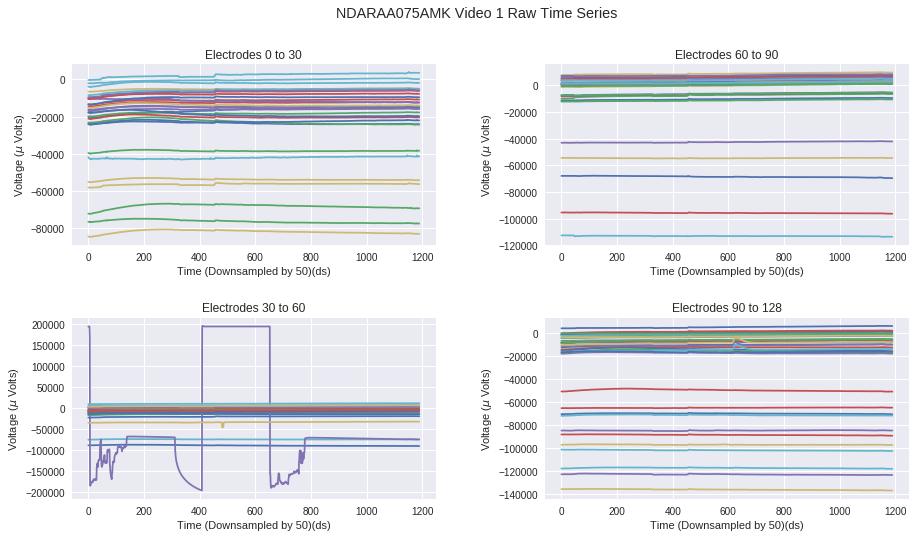

In [9]:
f, axarr = plt.subplots(2, 2, figsize=(15, 8))
f.suptitle('NDARAA075AMK Video 1 Raw Time Series')
f.subplots_adjust(wspace=.3, hspace=.4)

for i in range(2):
    for j in range(2):
        lo_elec = (2 * i + j) * 30
        hi_elec = 128
        if i != 1 or j != 1:
            hi_elec = (2 * i + j + 1) * 30
        axarr[j, i].set_title('Electrodes ' + str(lo_elec) + ' to ' + str(hi_elec))
        for k in range(lo_elec, hi_elec):
            axarr[j, i].plot(NDARAA075AMK['video1'][k, ::50])
            axarr[j, i].set_xlabel('Time (Downsampled by 50)(ds)')
            axarr[j, i].set_ylabel('Voltage ($\mu$ Volts)')

plt.show()

**Look at simply one electrode**

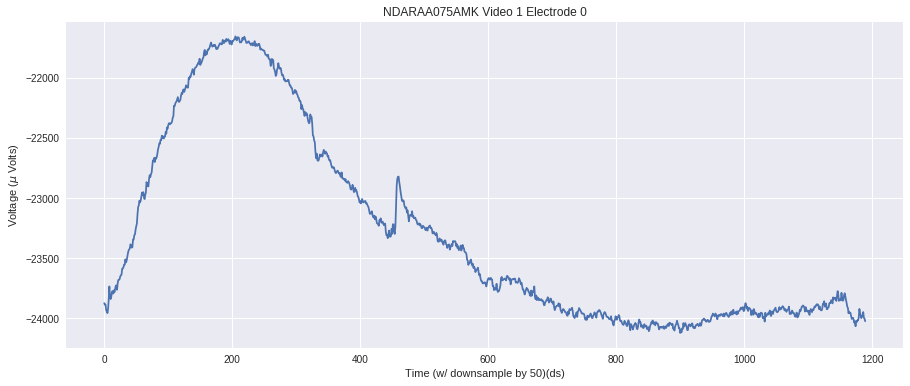

Minimum: -24122.0
Maximum: -21657.0
1st Quartile: -23956.0
Median: -23683.0
3rd Quartile: -22812.25


In [61]:
plt.figure(figsize=(15,6))
plt.title('NDARAA075AMK Video 1 Electrode 0')
plt.plot(NDARAA075AMK['video1'][0, ::50])
plt.xlabel('Time (w/ downsample by 50)(ds)')
plt.ylabel('Voltage ($\mu$ Volts)')
plt.show()
print 'Minimum: ' + str(NDARAA075AMK['video1'][0, ::50].min())
print 'Maximum: ' + str(NDARAA075AMK['video1'][0, ::50].max())
print '1st Quartile: ' + str(np.percentile(NDARAA075AMK['video1'][0, ::50], 25))
print 'Median: ' + str(np.percentile(NDARAA075AMK['video1'][0, ::50], 50))
print '3rd Quartile: ' + str(np.percentile(NDARAA075AMK['video1'][0, ::50], 75))

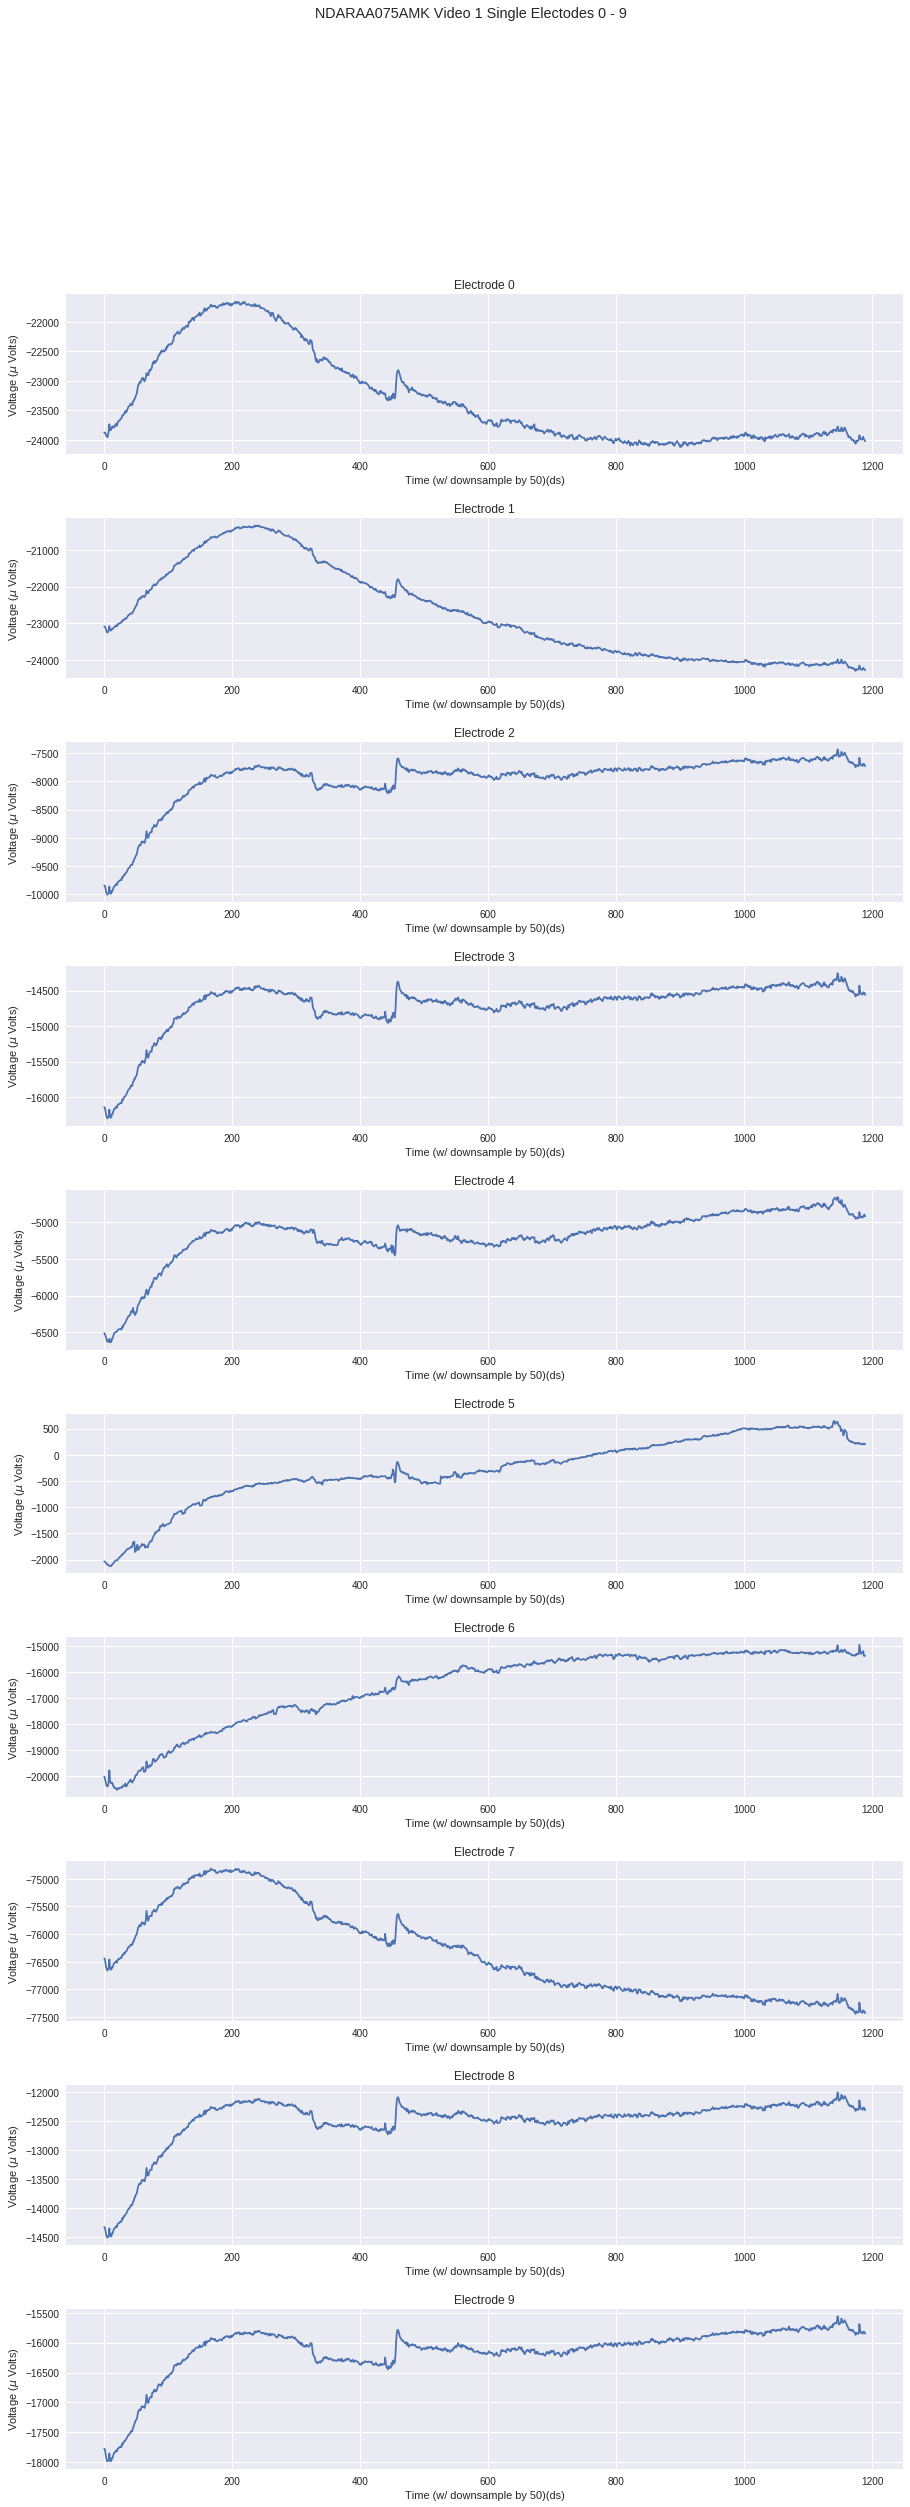

In [11]:
f, axarr = plt.subplots(10, 1, figsize=(15, 40))
f.suptitle('NDARAA075AMK Video 1 Single Electodes 0 - 9')
f.subplots_adjust(hspace=.4)

for i in range(10):
    axarr[i].set_title('Electrode ' + str(i))
    axarr[i].plot(NDARAA075AMK['video1'][i, ::50])
    axarr[i].set_xlabel('Time (w/ downsample by 50)(ds)')
    axarr[i].set_ylabel('Voltage ($\mu$ Volts)')
    
plt.show()

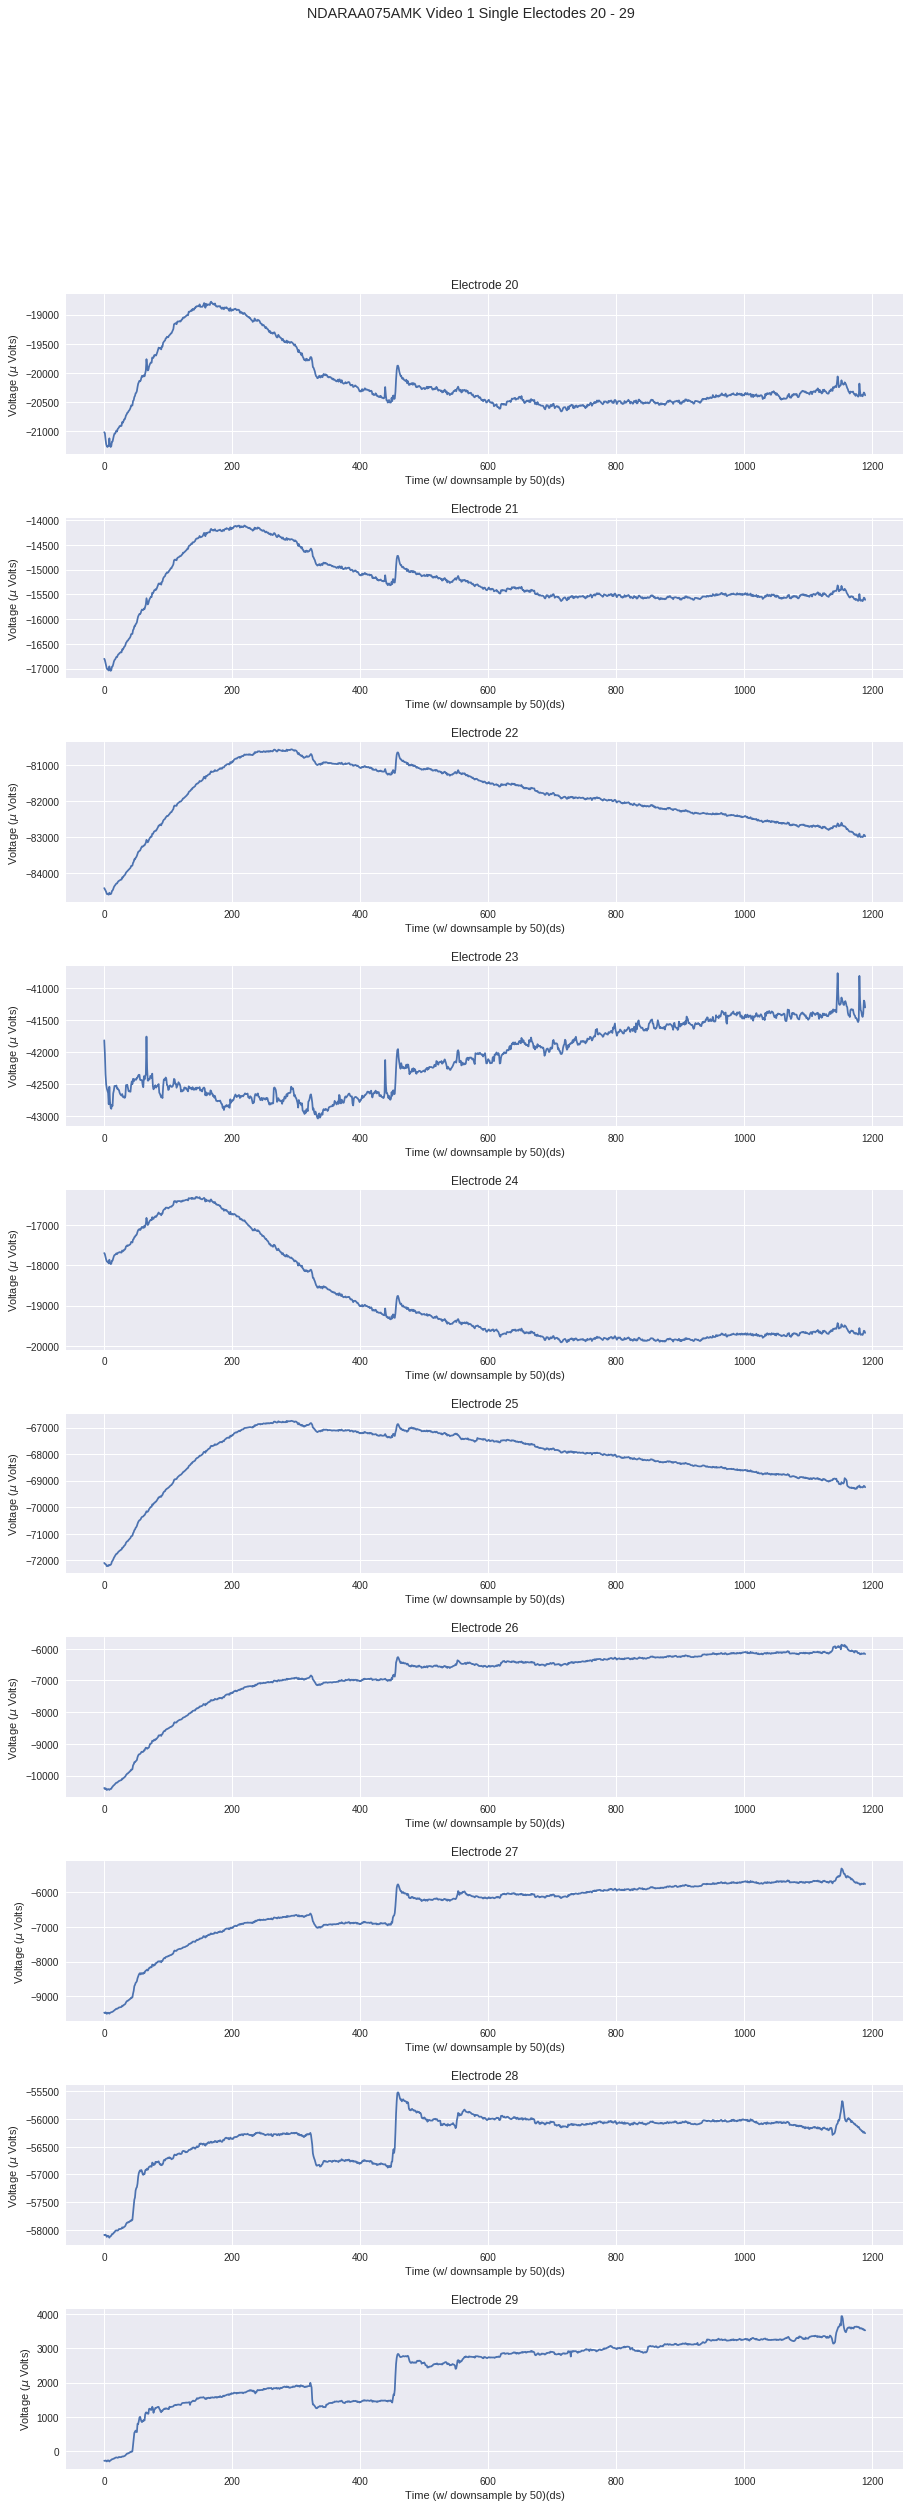

In [12]:
f, axarr = plt.subplots(10, 1, figsize=(15, 40))
f.suptitle('NDARAA075AMK Video 1 Single Electodes 20 - 29')
f.subplots_adjust(hspace=.4)

for i in range(10):
    axarr[i].set_title('Electrode ' + str(20 + i))
    axarr[i].plot(NDARAA075AMK['video1'][20 + i, ::50])
    axarr[i].set_xlabel('Time (w/ downsample by 50)(ds)')
    axarr[i].set_ylabel('Voltage ($\mu$ Volts)')
    
plt.show()

**Correlation Matrix**

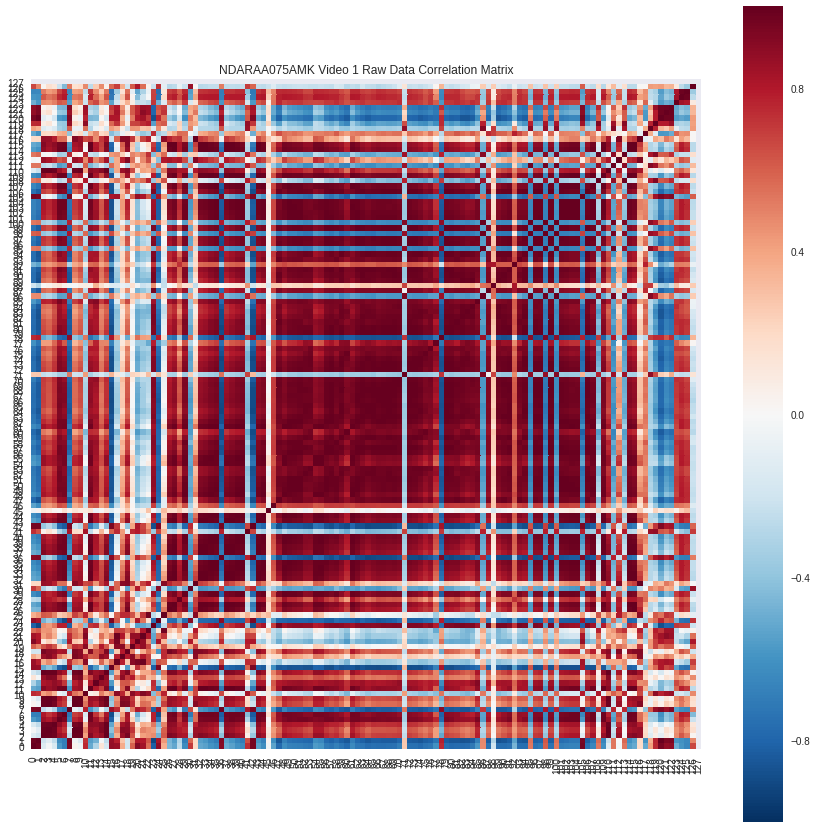

In [19]:
correlation_mat = np.corrcoef(NDARAA075AMK['video1'])
plt.figure(figsize=(15,15))
plt.title('NDARAA075AMK Video 1 Raw Data Correlation Matrix')
ax = sns.heatmap(correlation_mat, square=True)
ax.invert_yaxis()

**Power Spectrum**

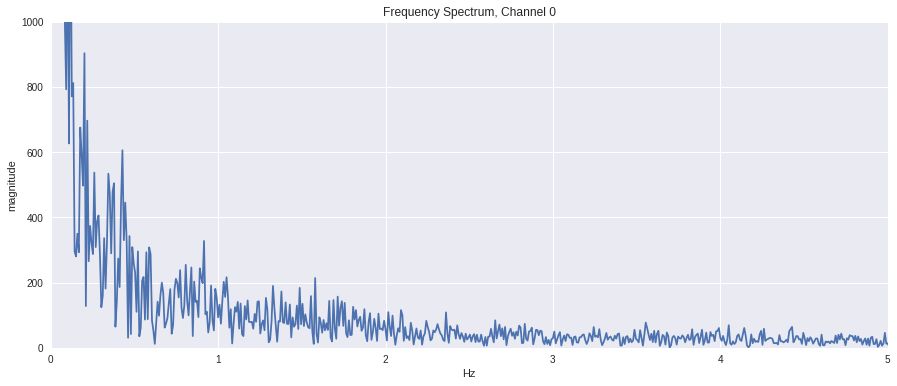

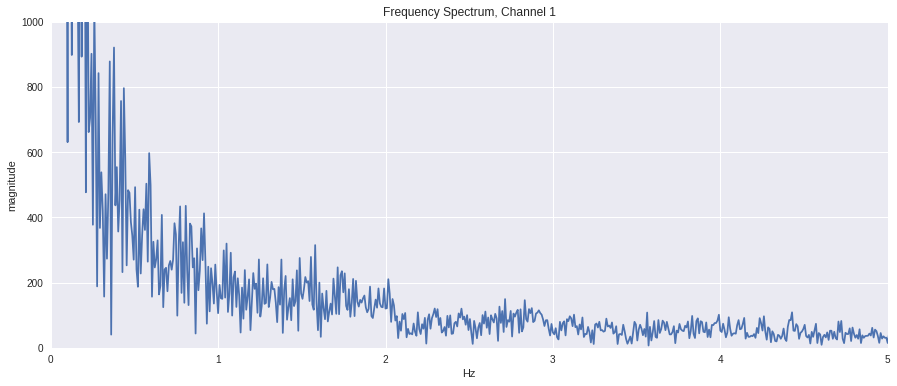

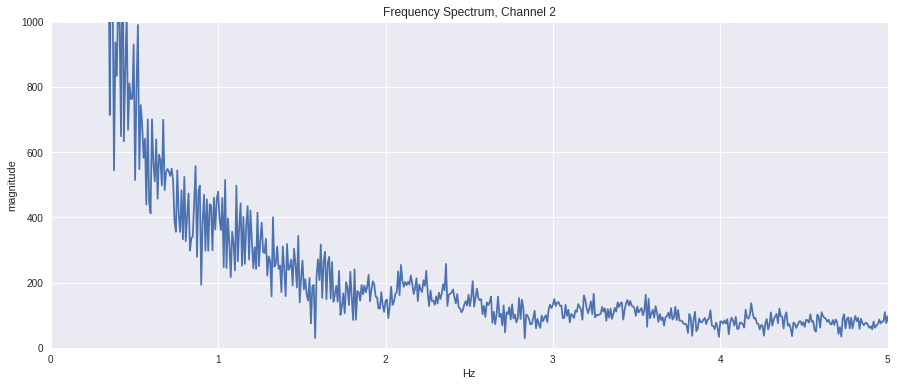

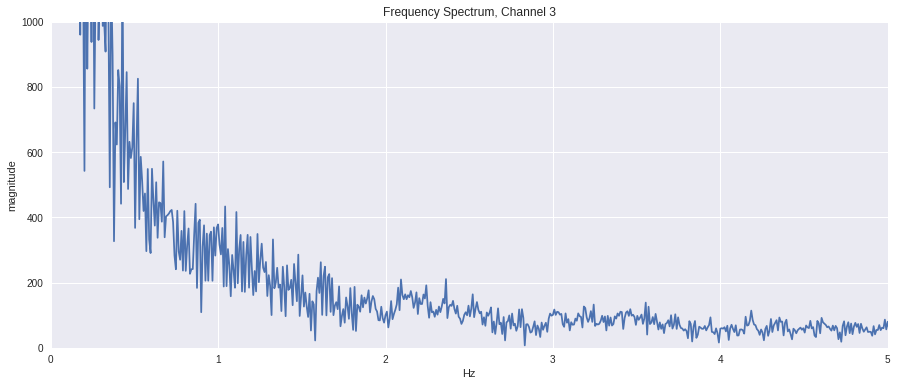

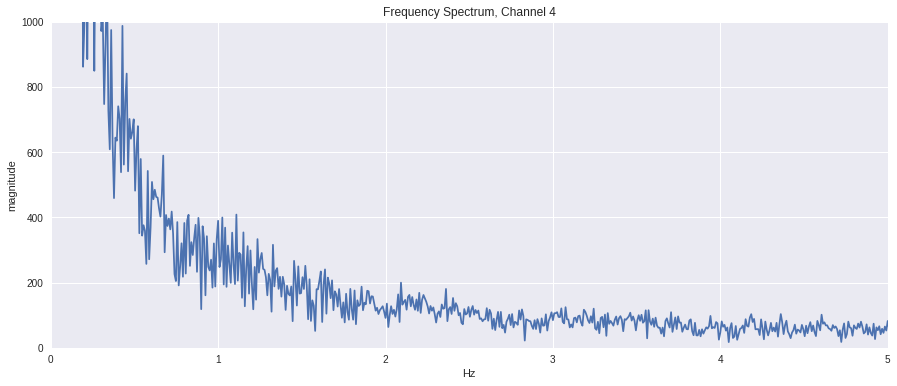

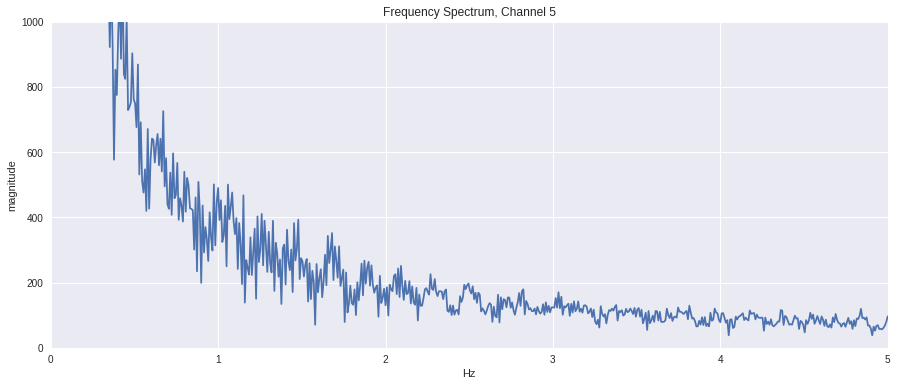

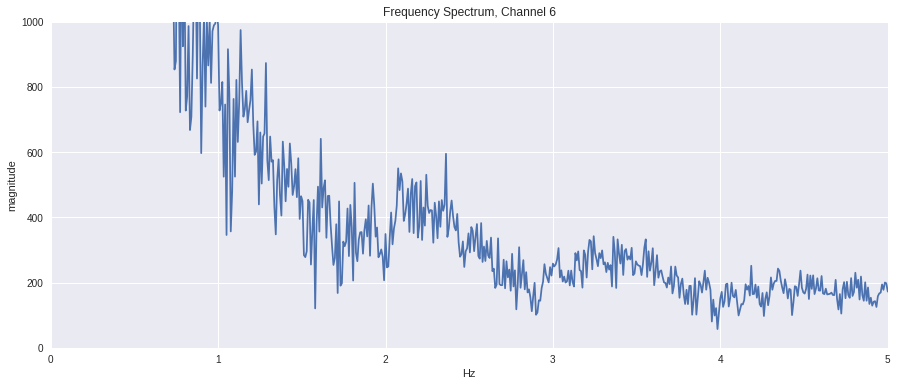

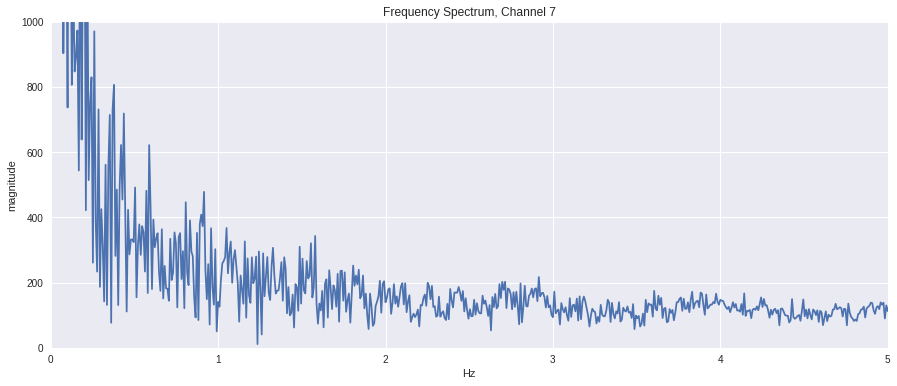

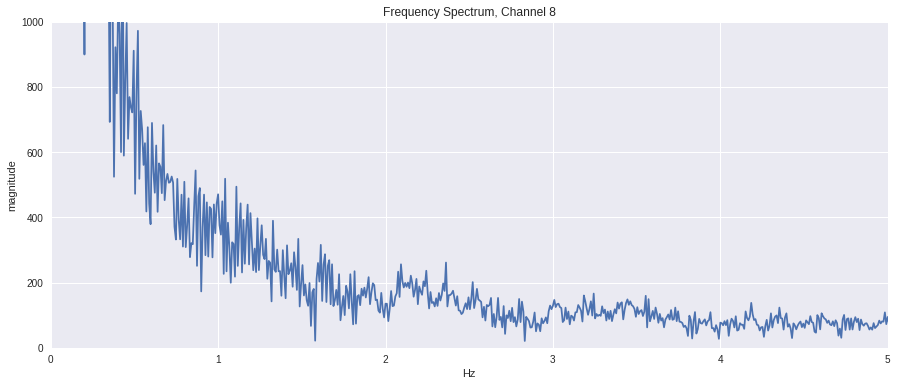

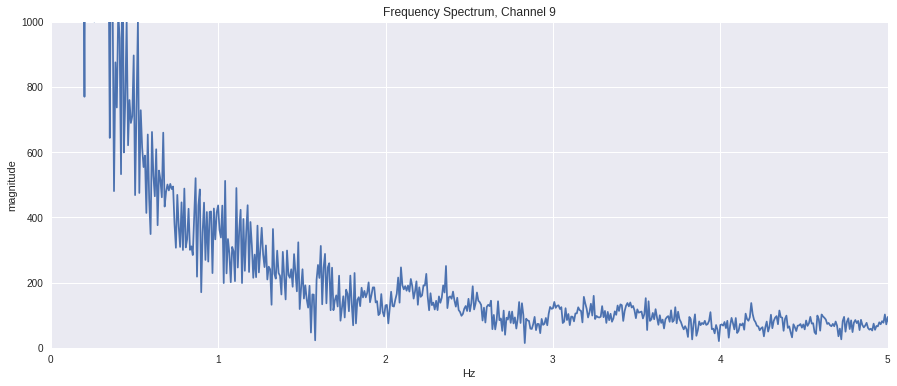

In [46]:
F_s = 500 # sampling freq
dt = 1./F_s

for i in range(10):
    sample_points = np.arange(NDARAA075AMK['video1'].shape[1]) * dt
    signal = NDARAA075AMK['video1'][i, :]
    ft = np.fft.fft(signal) * dt
    ft = ft[: len(sample_points)/2]
    freq = np.fft.fftfreq(len(sample_points), dt)
    freq = freq[:len(sample_points)/2]

    plt.figure(figsize=(15,6))
    plt.plot(freq[:2000] , np.abs(ft)[:2000])
    plt.title('Frequency Spectrum, Channel ' + str(i))
    plt.xlabel("Hz")
    plt.xlim((0, 5))
    plt.ylim((0, 1000))
    plt.ylabel("magnitude")

plt.show()

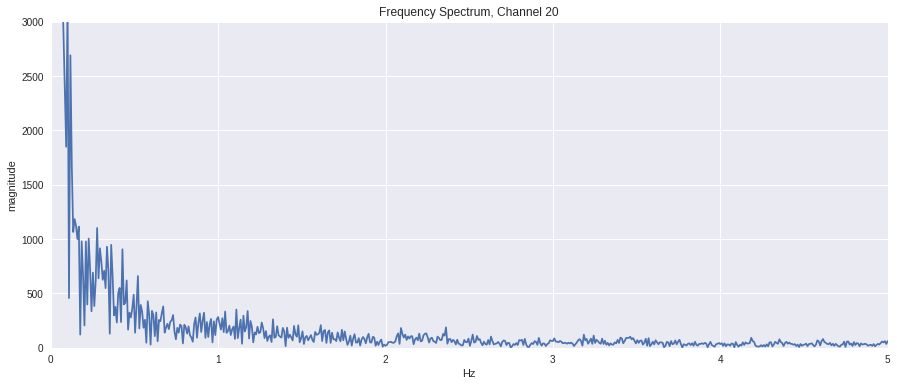

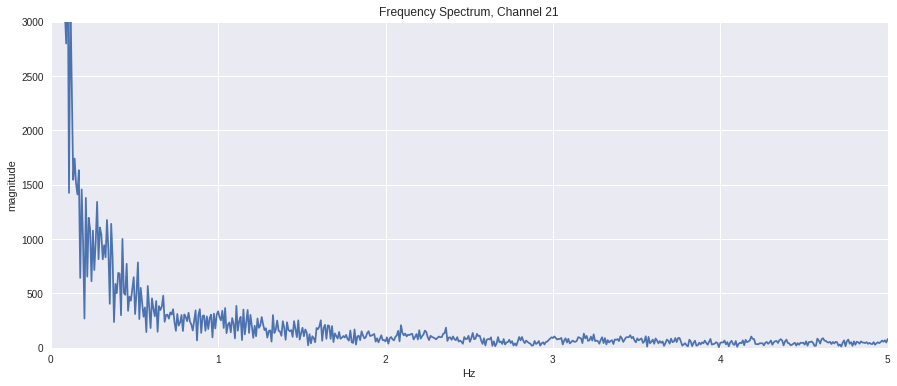

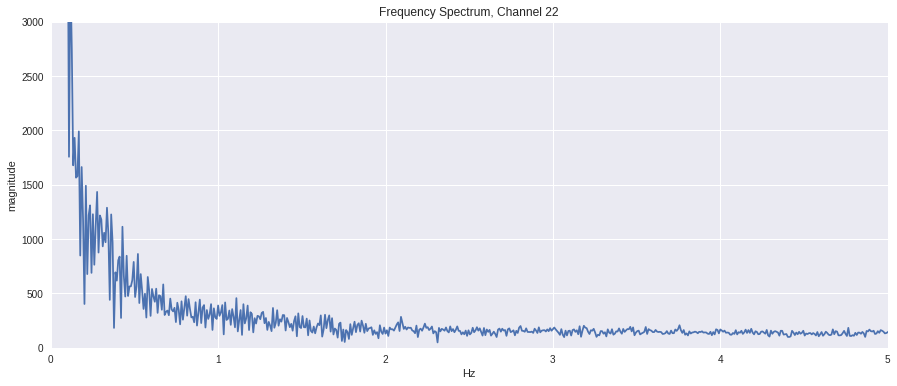

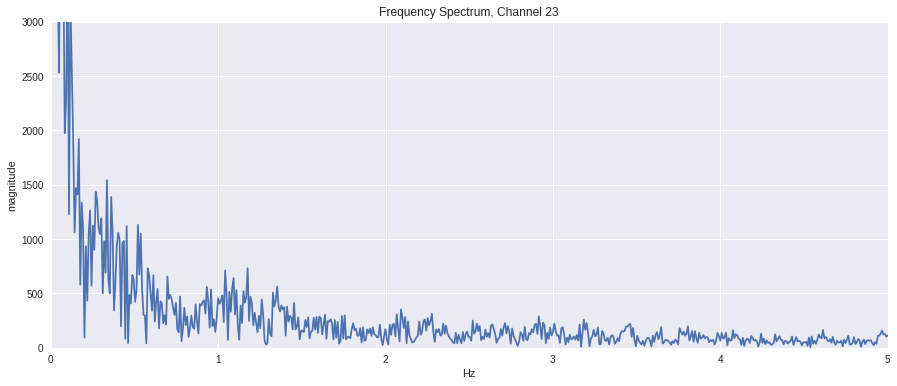

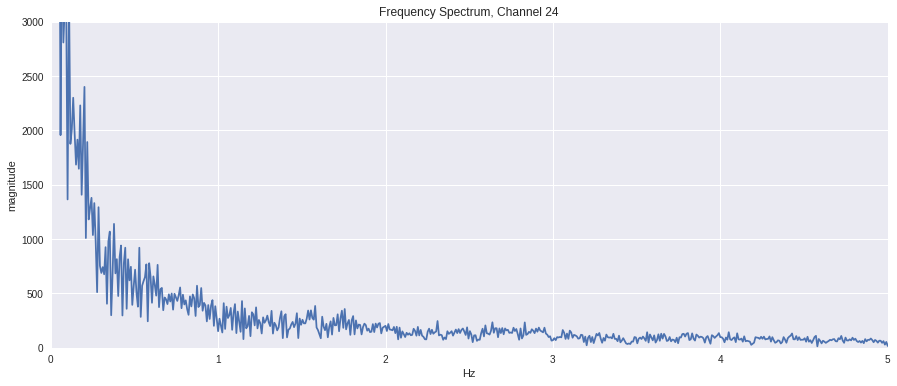

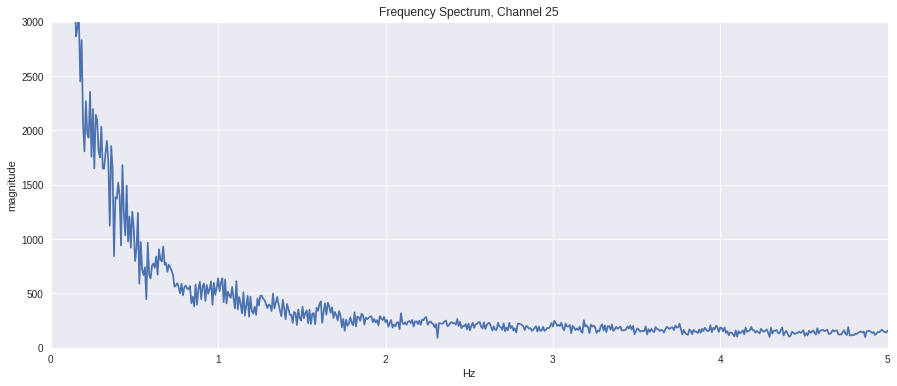

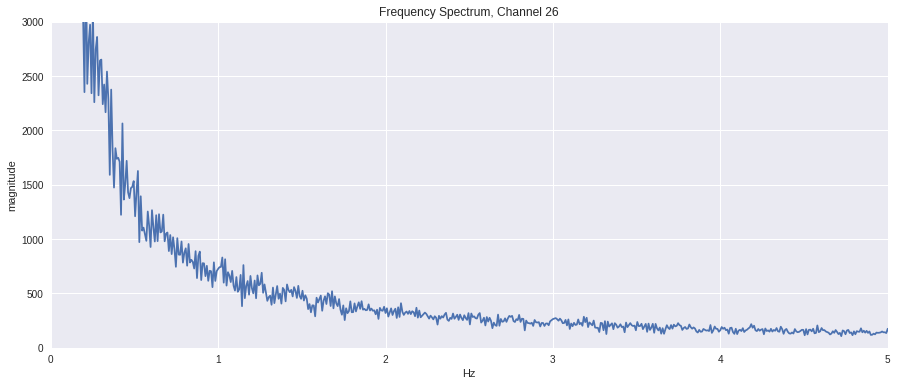

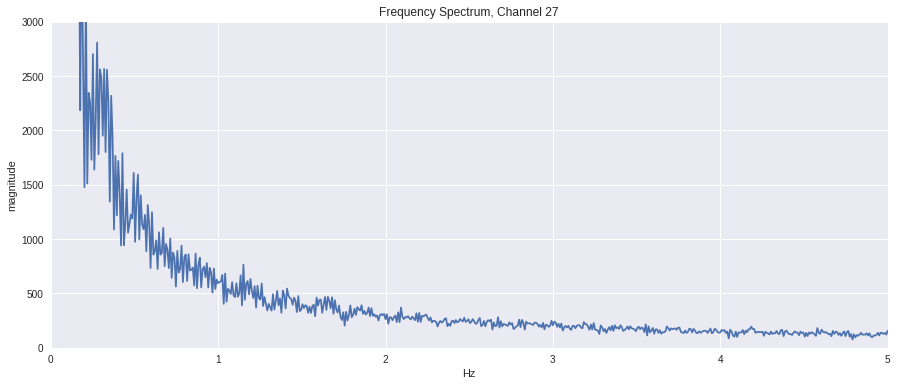

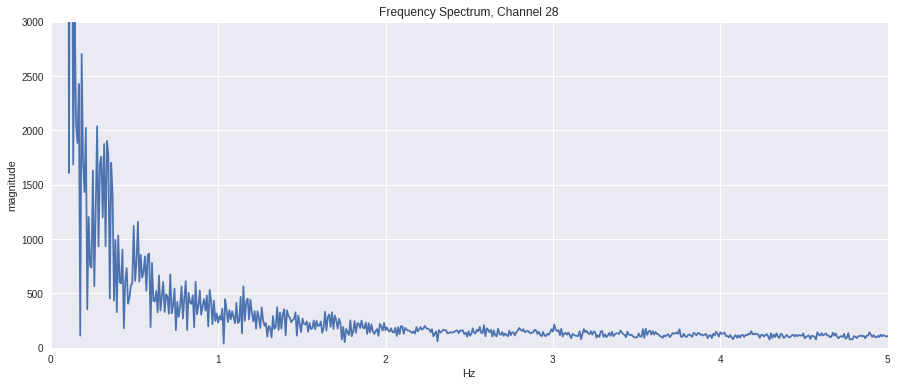

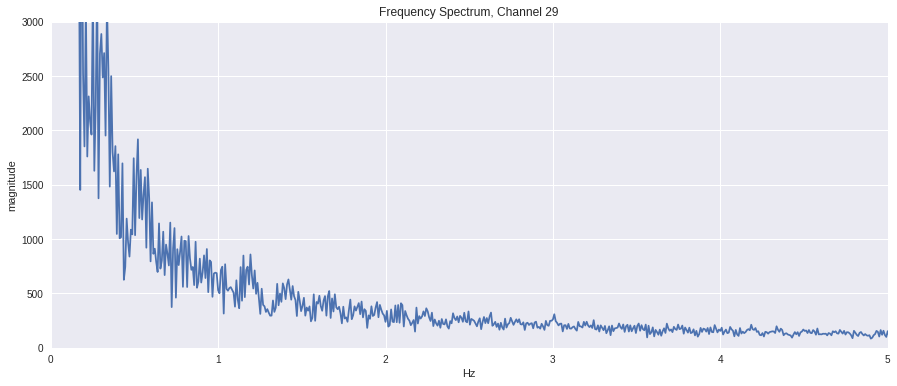

In [49]:
F_s = 500 # sampling freq
dt = 1./F_s

for i in range(10):
    sample_points = np.arange(NDARAA075AMK['video1'].shape[1]) * dt
    signal = NDARAA075AMK['video1'][20 + i, :]
    ft = np.fft.fft(signal) * dt
    ft = ft[: len(sample_points)/2]
    freq = np.fft.fftfreq(len(sample_points), dt)
    freq = freq[:len(sample_points)/2]

    plt.figure(figsize=(15,6))
    plt.plot(freq[:2000] , np.abs(ft)[:2000])
    plt.title('Frequency Spectrum, Channel ' + str(20 + i))
    plt.xlabel("Hz")
    plt.xlim((0, 5))
    plt.ylim((0, 3000))
    plt.ylabel("magnitude")
    plt.show()

**Try for different videos**

In [62]:
NDARAA075AMK['video2'] = pickle.load( open( "/home/nitin/hopkins/fall2017/ndd/eeg-panda-s17f18/data/NDARAA075AMK/EEG/raw/PANDA/NDARAA075AMK_Video2_data.pkl", "rb" ) )

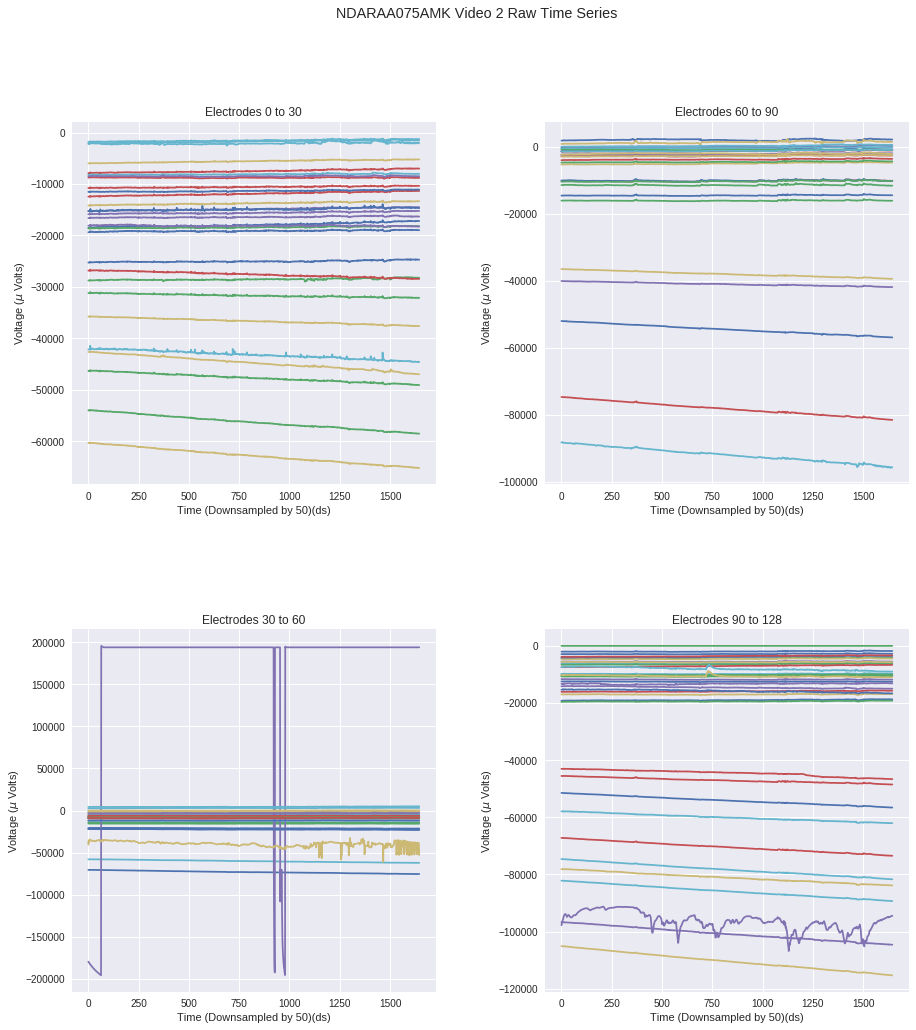

In [91]:
f, axarr = plt.subplots(2, 2, figsize=(15, 16))
f.suptitle('NDARAA075AMK Video 2 Raw Time Series')
f.subplots_adjust(wspace=.3, hspace=.4)

for i in range(2):
    for j in range(2):
        lo_elec = (2 * i + j) * 30
        hi_elec = 128
        if i != 1 or j != 1:
            hi_elec = (2 * i + j + 1) * 30
        axarr[j, i].set_title('Electrodes ' + str(lo_elec) + ' to ' + str(hi_elec))
        for k in range(lo_elec, hi_elec):
            axarr[j, i].plot(NDARAA075AMK['video2'][k, ::50])
            axarr[j, i].set_xlabel('Time (Downsampled by 50)(ds)')
            axarr[j, i].set_ylabel('Voltage ($\mu$ Volts)')

plt.show()

In [64]:
NDARAA075AMK['video3'] = pickle.load( open( "/home/nitin/hopkins/fall2017/ndd/eeg-panda-s17f18/data/NDARAA075AMK/EEG/raw/PANDA/NDARAA075AMK_Video3_data.pkl", "rb" ) )

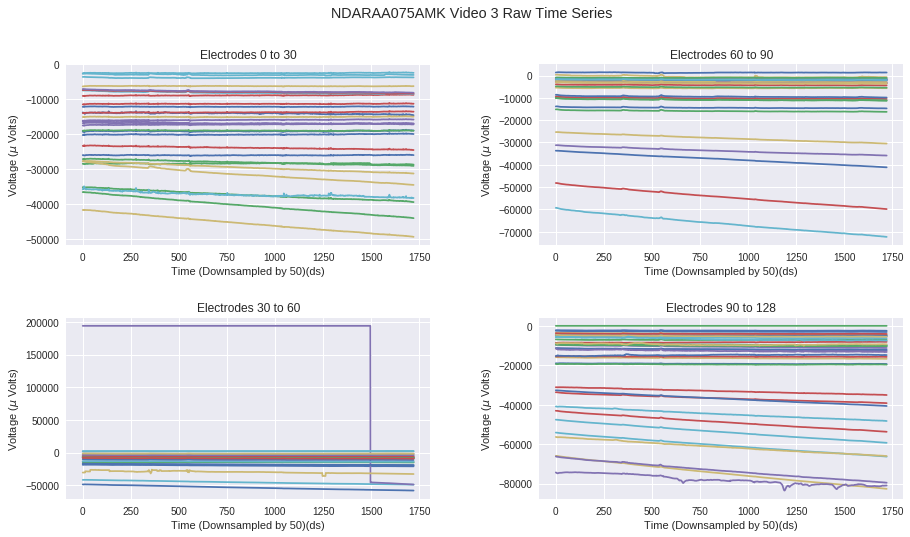

In [65]:
f, axarr = plt.subplots(2, 2, figsize=(15, 8))
f.suptitle('NDARAA075AMK Video 3 Raw Time Series')
f.subplots_adjust(wspace=.3, hspace=.4)

for i in range(2):
    for j in range(2):
        lo_elec = (2 * i + j) * 30
        hi_elec = 128
        if i != 1 or j != 1:
            hi_elec = (2 * i + j + 1) * 30
        axarr[j, i].set_title('Electrodes ' + str(lo_elec) + ' to ' + str(hi_elec))
        for k in range(lo_elec, hi_elec):
            axarr[j, i].plot(NDARAA075AMK['video3'][k, ::50])
            axarr[j, i].set_xlabel('Time (Downsampled by 50)(ds)')
            axarr[j, i].set_ylabel('Voltage ($\mu$ Volts)')

plt.show()

**Compare the 3 Videos**

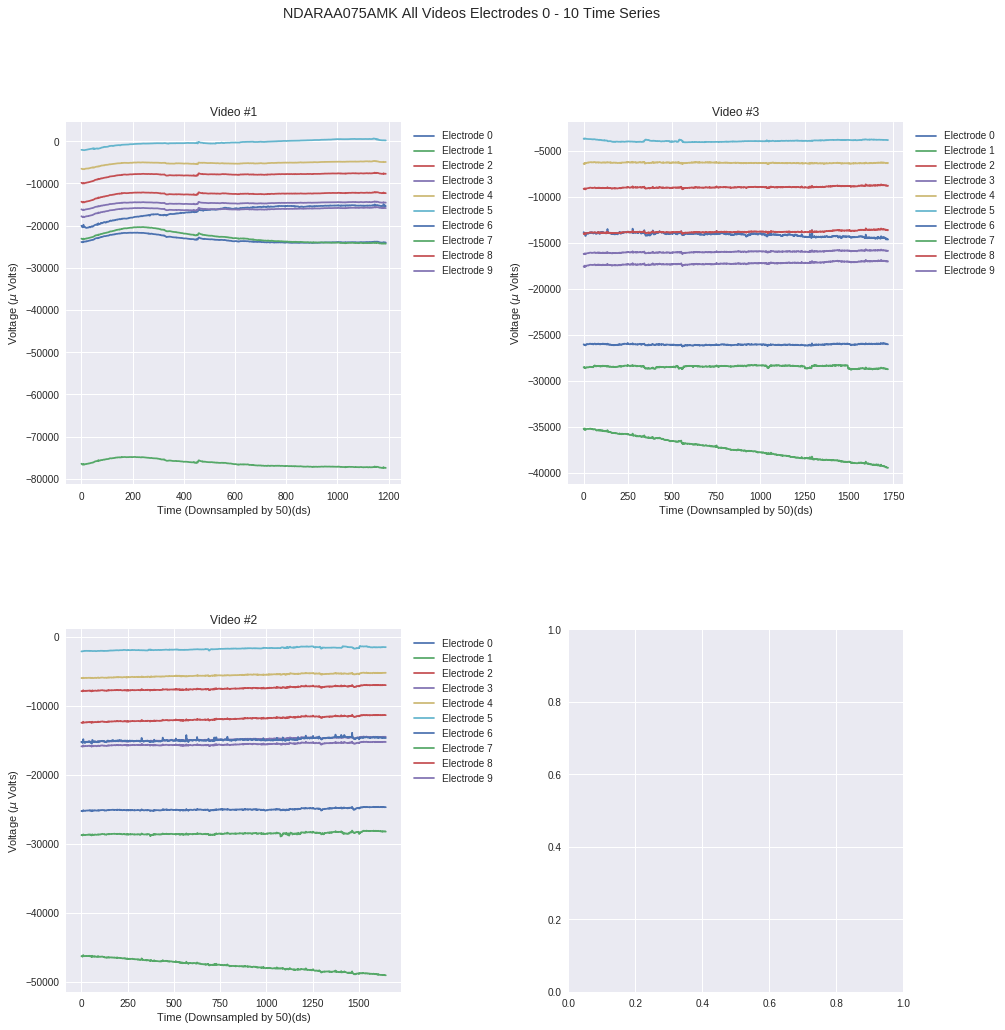

In [90]:
f, axarr = plt.subplots(2, 2, figsize=(15, 16))
f.suptitle('NDARAA075AMK All Videos Electrodes 0 - 10 Time Series')
f.subplots_adjust(wspace=.5, hspace=.4)

for i in range(2):
    for j in range(2):
        lo_elec = 0
        hi_elec = 10
        vid_num = 2 * i + j + 1
        if vid_num < 4:
            axarr[j, i].set_title('Video #' + str(vid_num))
            for k in range(lo_elec, hi_elec):
                axarr[j, i].plot(NDARAA075AMK['video' + str(vid_num)][k, ::50], label = 'Electrode ' + str(k))
                axarr[j, i].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
                axarr[j, i].set_xlabel('Time (Downsampled by 50)(ds)')
                axarr[j, i].set_ylabel('Voltage ($\mu$ Volts)')

plt.show()

Video 1 Stats:
Mean: -23312.5
Median: -23683.0

Video 2 Stats:
Mean: -25019.8
Median: -25063.0

Video 3 Stats:
Mean: -26046.2
Median: -26051.0



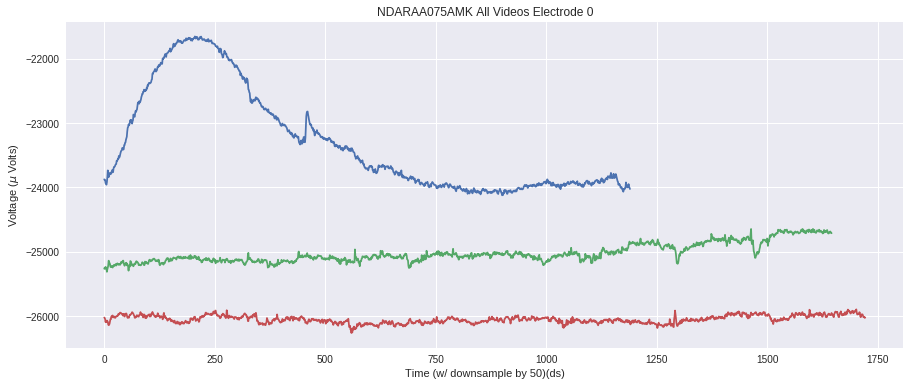

In [96]:
plt.figure(figsize=(15,6))

plt.title('NDARAA075AMK All Videos Electrode 0')
for i in range(3):
    i = i + 1
    plt.plot(NDARAA075AMK['video' + str(i)][0, ::50], label='Video ' + str(i))
    plt.xlabel('Time (w/ downsample by 50)(ds)')
    plt.ylabel('Voltage ($\mu$ Volts)')
    print 'Video ' + str(i) + ' Stats:'
    print 'Mean: ' + str(np.mean(NDARAA075AMK['video' + str(i)][0, ::50]))
    print 'Median: ' + str(np.percentile(NDARAA075AMK['video' + str(i)][0, ::50], 50))
    print

plt.show()

In [ ]:
plt.figure(figsize=(15,6))

plt.title('NDARAA075AMK All Videos Electrode 0')
for i in range(3):
    i = i + 1
    plt.plot(NDARAA075AMK['video' + str(i)][0, ::50], label='Video ' + str(i))
    plt.xlabel('Time (w/ downsample by 50)(ds)')
    plt.ylabel('Voltage ($\mu$ Volts)')
    print 'Video ' + str(i) + ' Stats:'
    print 'Mean: ' + str(np.mean(NDARAA075AMK['video' + str(i)][0, ::50]))
    print 'Median: ' + str(np.percentile(NDARAA075AMK['video' + str(i)][0, ::50], 50))
    print

plt.show()

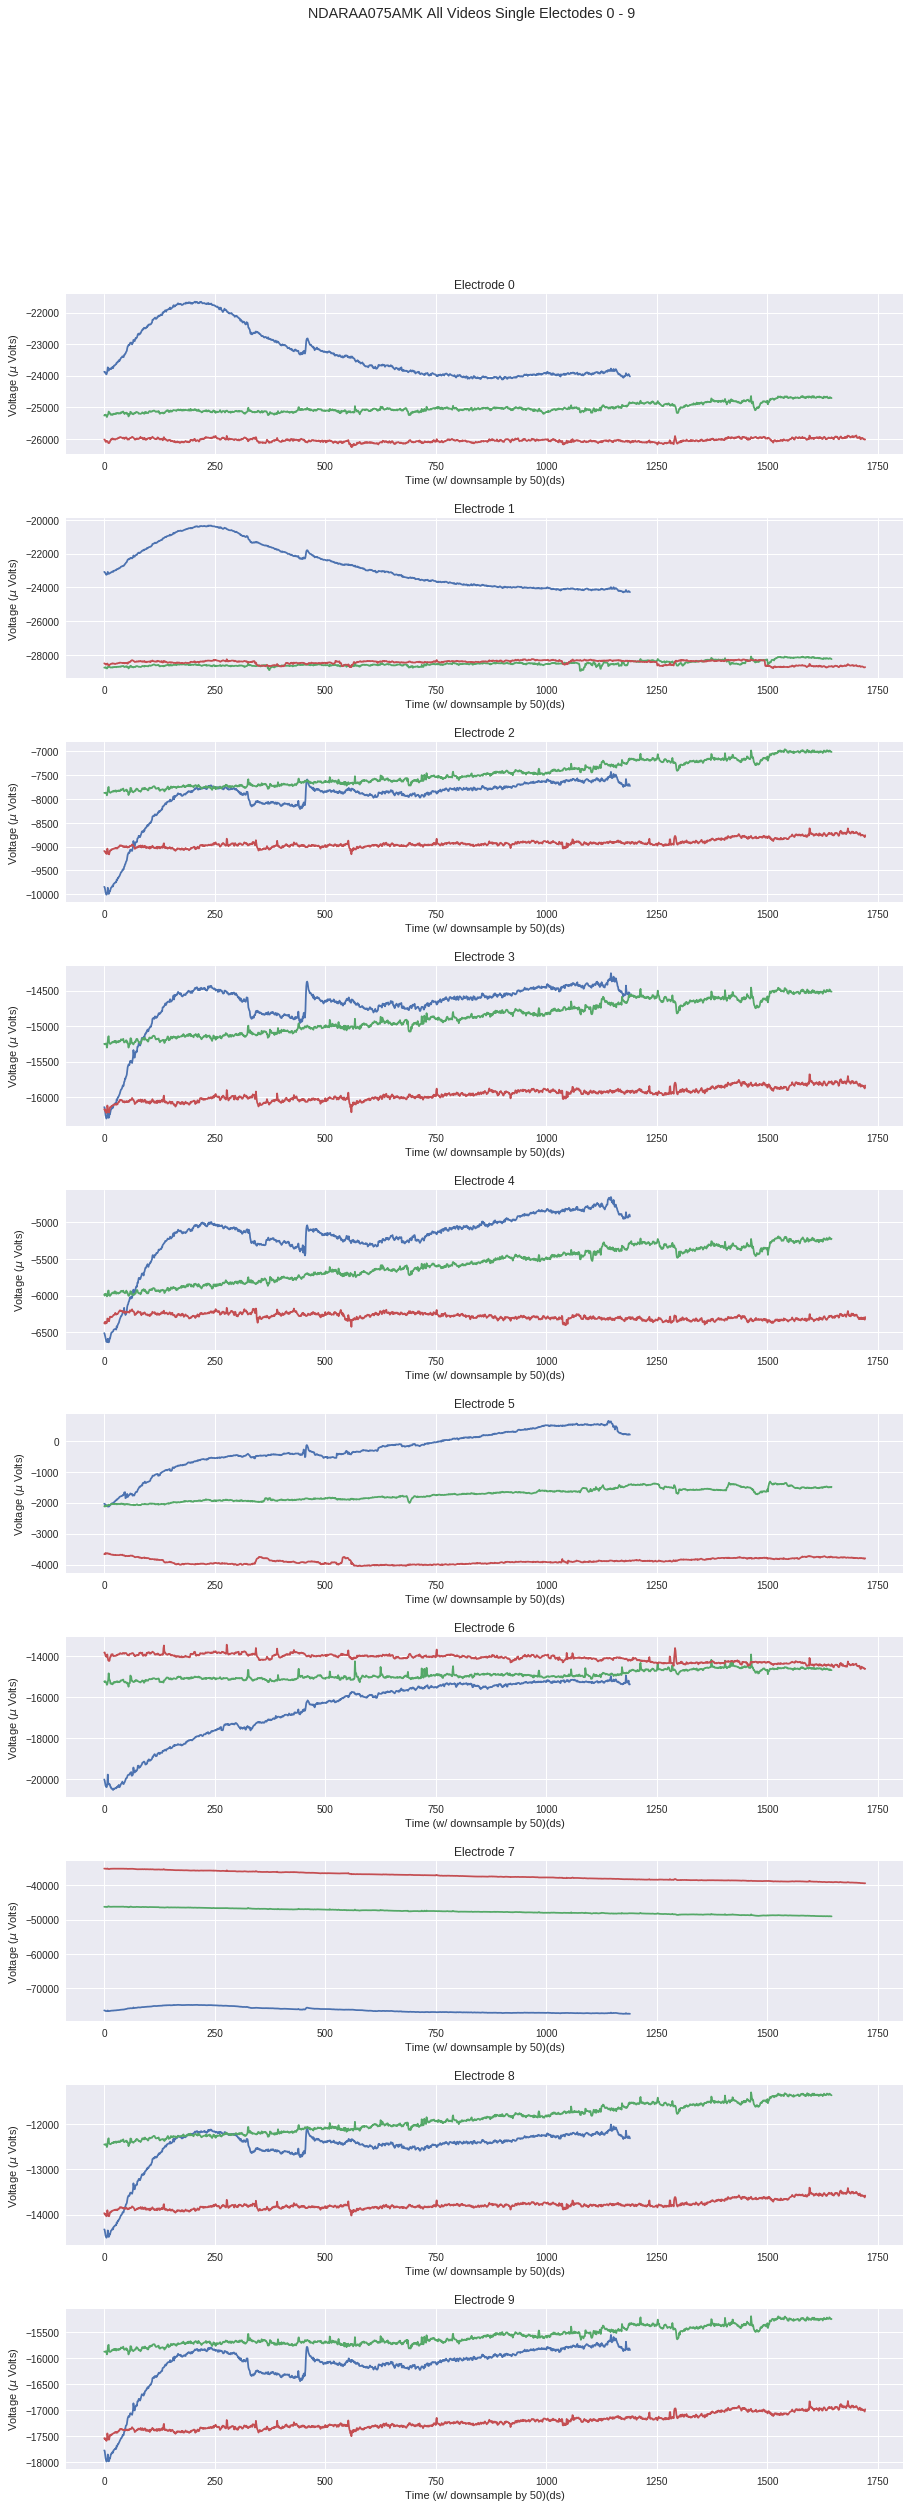

In [97]:
f, axarr = plt.subplots(10, 1, figsize=(15, 40))
f.suptitle('NDARAA075AMK All Videos Single Electodes 0 - 9')
f.subplots_adjust(hspace=.4)

for i in range(10):
    axarr[i].set_title('Electrode ' + str(i))
    axarr[i].plot(NDARAA075AMK['video1'][i, ::50])
    axarr[i].plot(NDARAA075AMK['video2'][i, ::50])
    axarr[i].plot(NDARAA075AMK['video3'][i, ::50])
    axarr[i].set_xlabel('Time (w/ downsample by 50)(ds)')
    axarr[i].set_ylabel('Voltage ($\mu$ Volts)')
    
plt.show()